In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from ipywidgets import interact

from longstaff_schwartz.binomial import create_binomial_model, american_put_price, american_put_exercise_barrier, american_put_exercise_barrier_fitted

766386.6573592064

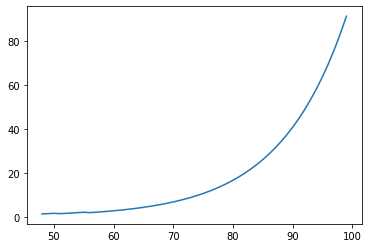

In [2]:
mdl = create_binomial_model(sigma=0.4, r=1e-14, S0=100, T=5, n=100)
exercise_barrier = american_put_exercise_barrier(mdl, 100)
plt.plot(exercise_barrier);
mdl.ST.max()

In [3]:
@interact(r=(-0.02, 0.1, 0.000000001))
def p(r=0.00000000000001):
    mdl = create_binomial_model(sigma=0.4, r=r, S0=100, T=5, n=10)
    print(american_put_price(mdl, 100))
    #exercise_barrier = american_put_exercise_barrier(mdl, 100)
    #plt.plot(exercise_barrier);

interactive(children=(FloatSlider(value=1e-14, description='r', max=0.1, min=-0.02, step=1e-09), Output()), _d…

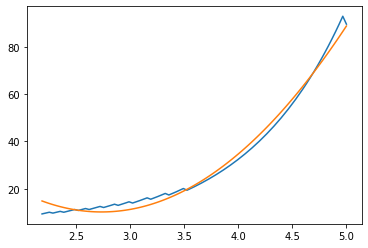

In [4]:
n = 150
mdl = create_binomial_model(sigma=0.2, r=1e-14, S0=100, T=5, n=n)
exercise_barrier = american_put_exercise_barrier(mdl, 100)
tau = np.linspace(0, 5, n)
ex_exists = ~np.isnan(exercise_barrier)
fitted = Polynomial.fit(tau[ex_exists], exercise_barrier[ex_exists], 2)
plt.plot(tau, exercise_barrier);
plt.plot(*fitted.linspace())

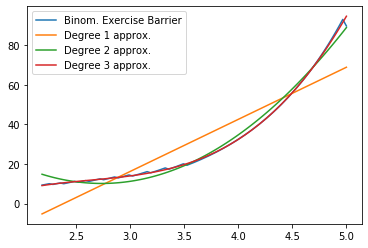

In [5]:
exercise_barrier = american_put_exercise_barrier(mdl, 100)
tau = np.linspace(0, 5, n)
ex_exists = ~np.isnan(exercise_barrier)
plt.plot(tau, exercise_barrier);
for i in range(1, 4):
    b = american_put_exercise_barrier_fitted(mdl, 100, i)
    plt.plot(*b.linspace());
plt.legend(['Binom. Exercise Barrier', 'Degree 1 approx.', 'Degree 2 approx.', 'Degree 3 approx.']);